# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [22]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [24]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447625e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738421e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017149607938732093


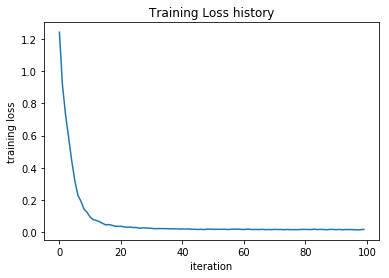

In [26]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [27]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [28]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

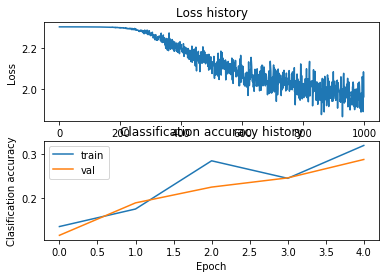

In [29]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

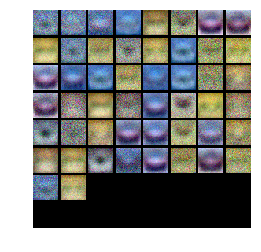

In [30]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [35]:
best_net = None # store the best model into this 
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
#idden layer size, learning rate, numer of training epochs, and regularization strength
import random
best_accuracy=0
for i in range(100):
    input_size = 32 * 32 * 3
    hidden_size = random.randint(110,130)
    num_classes = 10
    lr = 10 ** np.random.uniform(-5,-3)
    num_of_training_epochs = random.randint(500,2000)
    reg = 0.25
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    # Train the network
    stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=num_of_training_epochs, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=True)
    
    val_accuracy = (net.predict(X_val) == y_val).mean()
    print("hidden_size:%d ,learning_rate:%.10lf ,numer_of_training_epochs:%d ,reg:%.10lf\n val_acc:%.10lf\n"
          %(hidden_size,lr,num_of_training_epochs,reg,val_accuracy))
    
    if val_acc>best_accuracy:
        best_accuracy=val_accuracy
        best_net=net
print("Best accuracy is: %.10lf\n"%best_accuracy)
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 555: loss 2.303563
iteration 100 / 555: loss 2.039037
iteration 200 / 555: loss 1.794456
iteration 300 / 555: loss 1.706017
iteration 400 / 555: loss 1.680241
iteration 500 / 555: loss 1.682837
hidden_size:128 ,learning_rate:0.0008092449 ,numer_of_training_epochs:555 ,reg:0.2500000000
 val_acc:0.4410000000

iteration 0 / 886: loss 2.303545
iteration 100 / 886: loss 2.303423
iteration 200 / 886: loss 2.303392
iteration 300 / 886: loss 2.303308
iteration 400 / 886: loss 2.303083
iteration 500 / 886: loss 2.303017
iteration 600 / 886: loss 2.303045
iteration 700 / 886: loss 2.302428
iteration 800 / 886: loss 2.302082
hidden_size:126 ,learning_rate:0.0000141909 ,numer_of_training_epochs:886 ,reg:0.2500000000
 val_acc:0.2150000000

iteration 0 / 1102: loss 2.303517
iteration 100 / 1102: loss 2.303318
iteration 200 / 1102: loss 2.302991
iteration 300 / 1102: loss 2.302220
iteration 400 / 1102: loss 2.301415
iteration 500 / 1102: loss 2.298476
iteration 600 / 1102: loss 2.295359

iteration 100 / 1615: loss 2.301821
iteration 200 / 1615: loss 2.277767
iteration 300 / 1615: loss 2.235248
iteration 400 / 1615: loss 2.104818
iteration 500 / 1615: loss 2.044285
iteration 600 / 1615: loss 2.059941
iteration 700 / 1615: loss 1.932447
iteration 800 / 1615: loss 1.916604
iteration 900 / 1615: loss 1.841080
iteration 1000 / 1615: loss 1.903022
iteration 1100 / 1615: loss 1.983895
iteration 1200 / 1615: loss 1.866177
iteration 1300 / 1615: loss 1.814810
iteration 1400 / 1615: loss 1.837991
iteration 1500 / 1615: loss 1.741242
iteration 1600 / 1615: loss 1.742160
hidden_size:120 ,learning_rate:0.0001227949 ,numer_of_training_epochs:1615 ,reg:0.2500000000
 val_acc:0.3740000000

iteration 0 / 910: loss 2.303535
iteration 100 / 910: loss 2.303038
iteration 200 / 910: loss 2.301278
iteration 300 / 910: loss 2.294649
iteration 400 / 910: loss 2.280453
iteration 500 / 910: loss 2.231590
iteration 600 / 910: loss 2.189509
iteration 700 / 910: loss 2.121126
iteration 800 / 910: lo

iteration 500 / 1569: loss 1.614495
iteration 600 / 1569: loss 1.659380
iteration 700 / 1569: loss 1.550347
iteration 800 / 1569: loss 1.532833
iteration 900 / 1569: loss 1.673645
iteration 1000 / 1569: loss 1.478279
iteration 1100 / 1569: loss 1.409226
iteration 1200 / 1569: loss 1.413395
iteration 1300 / 1569: loss 1.473528
iteration 1400 / 1569: loss 1.438040
iteration 1500 / 1569: loss 1.466767
hidden_size:118 ,learning_rate:0.0008365916 ,numer_of_training_epochs:1569 ,reg:0.2500000000
 val_acc:0.4920000000

iteration 0 / 600: loss 2.303431
iteration 100 / 600: loss 1.929150
iteration 200 / 600: loss 1.786406
iteration 300 / 600: loss 1.625886
iteration 400 / 600: loss 1.602129
iteration 500 / 600: loss 1.565823
hidden_size:114 ,learning_rate:0.0008339980 ,numer_of_training_epochs:600 ,reg:0.2500000000
 val_acc:0.4300000000

iteration 0 / 1769: loss 2.303427
iteration 100 / 1769: loss 2.303288
iteration 200 / 1769: loss 2.302957
iteration 300 / 1769: loss 2.302317
iteration 400 / 1

iteration 900 / 1612: loss 1.534237
iteration 1000 / 1612: loss 1.498856
iteration 1100 / 1612: loss 1.564107
iteration 1200 / 1612: loss 1.408051
iteration 1300 / 1612: loss 1.493436
iteration 1400 / 1612: loss 1.461456
iteration 1500 / 1612: loss 1.402195
iteration 1600 / 1612: loss 1.528760
hidden_size:126 ,learning_rate:0.0007302727 ,numer_of_training_epochs:1612 ,reg:0.2500000000
 val_acc:0.4710000000

iteration 0 / 728: loss 2.303537
iteration 100 / 728: loss 2.302468
iteration 200 / 728: loss 2.295169
iteration 300 / 728: loss 2.235155
iteration 400 / 728: loss 2.181188
iteration 500 / 728: loss 2.149430
iteration 600 / 728: loss 2.064845
iteration 700 / 728: loss 2.080621
hidden_size:120 ,learning_rate:0.0000916202 ,numer_of_training_epochs:728 ,reg:0.2500000000
 val_acc:0.2550000000

iteration 0 / 1810: loss 2.303563
iteration 100 / 1810: loss 2.233670
iteration 200 / 1810: loss 2.034286
iteration 300 / 1810: loss 1.899750
iteration 400 / 1810: loss 1.942184
iteration 500 / 18

iteration 1100 / 1692: loss 1.710825
iteration 1200 / 1692: loss 1.674877
iteration 1300 / 1692: loss 1.639188
iteration 1400 / 1692: loss 1.698804
iteration 1500 / 1692: loss 1.584349
iteration 1600 / 1692: loss 1.622878
hidden_size:126 ,learning_rate:0.0002754707 ,numer_of_training_epochs:1692 ,reg:0.2500000000
 val_acc:0.4480000000

iteration 0 / 1727: loss 2.303445
iteration 100 / 1727: loss 2.284003
iteration 200 / 1727: loss 2.073047
iteration 300 / 1727: loss 2.058617
iteration 400 / 1727: loss 1.966849
iteration 500 / 1727: loss 1.950004
iteration 600 / 1727: loss 1.853544
iteration 700 / 1727: loss 1.801345
iteration 800 / 1727: loss 1.775608
iteration 900 / 1727: loss 1.764310
iteration 1000 / 1727: loss 1.818581
iteration 1100 / 1727: loss 1.622627
iteration 1200 / 1727: loss 1.738822
iteration 1300 / 1727: loss 1.723443
iteration 1400 / 1727: loss 1.600017
iteration 1500 / 1727: loss 1.622211
iteration 1600 / 1727: loss 1.589891
iteration 1700 / 1727: loss 1.650841
hidden_s

iteration 700 / 1519: loss 1.630246
iteration 800 / 1519: loss 1.568953
iteration 900 / 1519: loss 1.746826
iteration 1000 / 1519: loss 1.609126
iteration 1100 / 1519: loss 1.639002
iteration 1200 / 1519: loss 1.557144
iteration 1300 / 1519: loss 1.650974
iteration 1400 / 1519: loss 1.512572
iteration 1500 / 1519: loss 1.444423
hidden_size:119 ,learning_rate:0.0005015140 ,numer_of_training_epochs:1519 ,reg:0.2500000000
 val_acc:0.4750000000

iteration 0 / 1301: loss 2.303534
iteration 100 / 1301: loss 2.302034
iteration 200 / 1301: loss 2.292513
iteration 300 / 1301: loss 2.258413
iteration 400 / 1301: loss 2.174447
iteration 500 / 1301: loss 2.078824
iteration 600 / 1301: loss 2.146489
iteration 700 / 1301: loss 2.014443
iteration 800 / 1301: loss 1.938507
iteration 900 / 1301: loss 1.956832
iteration 1000 / 1301: loss 1.911714
iteration 1100 / 1301: loss 1.986347
iteration 1200 / 1301: loss 1.857198
iteration 1300 / 1301: loss 1.949832
hidden_size:130 ,learning_rate:0.0000917282 ,num

hidden_size:116 ,learning_rate:0.0000752842 ,numer_of_training_epochs:1388 ,reg:0.2500000000
 val_acc:0.2920000000

iteration 0 / 974: loss 2.303522
iteration 100 / 974: loss 2.193412
iteration 200 / 974: loss 2.019909
iteration 300 / 974: loss 1.801343
iteration 400 / 974: loss 1.730651
iteration 500 / 974: loss 1.771061
iteration 600 / 974: loss 1.856600
iteration 700 / 974: loss 1.749868
iteration 800 / 974: loss 1.540914
iteration 900 / 974: loss 1.660283
hidden_size:120 ,learning_rate:0.0003979746 ,numer_of_training_epochs:974 ,reg:0.2500000000
 val_acc:0.4430000000

iteration 0 / 1927: loss 2.303453
iteration 100 / 1927: loss 2.235907
iteration 200 / 1927: loss 2.054532
iteration 300 / 1927: loss 1.958619
iteration 400 / 1927: loss 1.927611
iteration 500 / 1927: loss 1.863591
iteration 600 / 1927: loss 1.761079
iteration 700 / 1927: loss 1.776759
iteration 800 / 1927: loss 1.748378
iteration 900 / 1927: loss 1.678953
iteration 1000 / 1927: loss 1.722713
iteration 1100 / 1927: los

iteration 100 / 1479: loss 2.303447
iteration 200 / 1479: loss 2.303388
iteration 300 / 1479: loss 2.303169
iteration 400 / 1479: loss 2.302945
iteration 500 / 1479: loss 2.302850
iteration 600 / 1479: loss 2.302445
iteration 700 / 1479: loss 2.302124
iteration 800 / 1479: loss 2.302418
iteration 900 / 1479: loss 2.300865
iteration 1000 / 1479: loss 2.299592
iteration 1100 / 1479: loss 2.297995
iteration 1200 / 1479: loss 2.297015
iteration 1300 / 1479: loss 2.294777
iteration 1400 / 1479: loss 2.293626
hidden_size:128 ,learning_rate:0.0000154816 ,numer_of_training_epochs:1479 ,reg:0.2500000000
 val_acc:0.2070000000

iteration 0 / 1244: loss 2.303436
iteration 100 / 1244: loss 2.139112
iteration 200 / 1244: loss 2.015850
iteration 300 / 1244: loss 1.907523
iteration 400 / 1244: loss 1.809423
iteration 500 / 1244: loss 1.891330
iteration 600 / 1244: loss 1.808739
iteration 700 / 1244: loss 1.644208
iteration 800 / 1244: loss 1.792988
iteration 900 / 1244: loss 1.773941
iteration 1000 / 

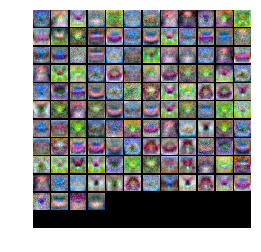

In [36]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [37]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.422


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:

*Your explanation:*